In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from faker import Faker
import random

         Longitud      Tiempo  Gravedad Calculada
count  100.000000  100.000000          100.000000
mean     1.414100    0.551000           10.147800
std      0.362288    0.088403            4.420176
min      0.740000    0.400000            3.020000
25%      1.130000    0.470000            6.682500
50%      1.470000    0.560000            9.085000
75%      1.732500    0.630000           12.740000
max      2.000000    0.700000           21.650000


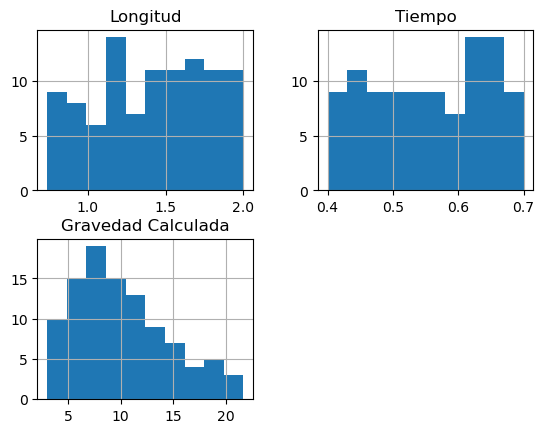

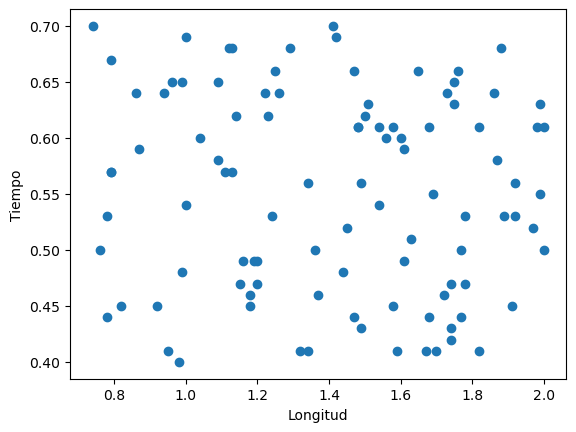

                              Longitud    Tiempo  Gravedad Calculada  \
Longitud                      1.000000 -0.078723            0.616022   
Tiempo                       -0.078723  1.000000           -0.790175   
Gravedad Calculada            0.616022 -0.790175            1.000000   
Planeta más probable          0.491594 -0.702698            0.805441   
Segundo planeta más probable -0.491594  0.702698           -0.805441   

                              Planeta más probable  \
Longitud                                  0.491594   
Tiempo                                   -0.702698   
Gravedad Calculada                        0.805441   
Planeta más probable                      1.000000   
Segundo planeta más probable             -1.000000   

                              Segundo planeta más probable  
Longitud                                         -0.491594  
Tiempo                                            0.702698  
Gravedad Calculada                               -0.805441 

In [43]:

fake = Faker()
planet_gravity = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}
def generate_sample(): #generamos datos aleatorios
    L = round(random.uniform(0.7,2), 2) #longitud
    t = round(random.uniform(0.4,0.7), 2)#tiempo
    grav_calculada = round((2*L)/(t**2), 2)#gravedad
    if abs(grav_calculada-9.8) < abs(grav_calculada- 9):#y el ploaneta mas probable segun la gravedad
        most_probable_planet= "tierra"
        second_most_probable_planet = "saturno"
    elif abs(grav_calculada-9) < abs(grav_calculada-9.8):
        most_probable_planet= "saturno"
        second_most_probable_planet = "tierra"
    return {                #devolvemos los datos
        "ID" : fake.uuid4(),
        "Longitud": L,
        "Tiempo": t,
        "Gravedad Calculada": grav_calculada,
        "Planeta más probable": most_probable_planet,
        "Segundo planeta más probable": second_most_probable_planet
     }
dataset = [generate_sample() for i in range(100)] #para crear el dataset
df= pd.DataFrame(dataset)
print(df.describe())
df.hist(column=["Longitud", "Tiempo", "Gravedad Calculada"])
plt.show()

plt.scatter(df["Longitud"], df["Tiempo"])#creamos las graficas
plt.xlabel("Longitud")
plt.ylabel("Tiempo")
plt.show()

label_encoder = LabelEncoder()
df["Planeta más probable"] = label_encoder.fit_transform(df["Planeta más probable"])
df["Segundo planeta más probable"] = label_encoder.fit_transform(df["Segundo planeta más probable"])

print(df.corr())





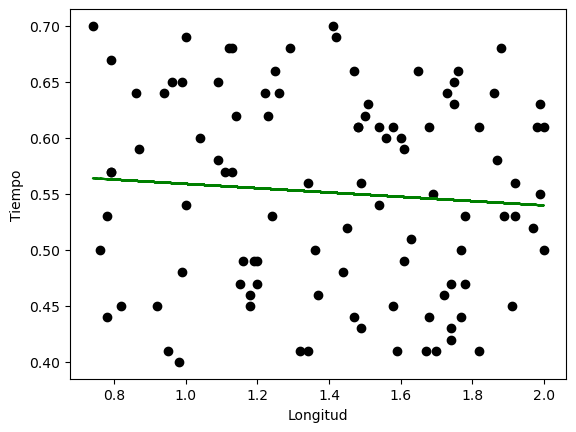

In [46]:
X= df["Longitud"].values.reshape(-1,1) #creamos el eje x donde values conviertelos valores de esa columna en un array de numpy
y = df["Tiempo"].values.reshape(-1,1) #despues, reshape convierte el array en en una matriz de 1 columna y el -1 es las filas que el crea convenuente

model=LinearRegression()
model.fit(X,y)#ajustamos la regresion lineal a los datos
y_pred = model.predict(X)#predice el modelo de la variable "x"
plt.scatter(X,y, color="black")#creamos los puntos
plt.plot(X,y_pred, color="green")#creamos la recta
plt.xlabel("Longitud")#ponemos lo q pondra en el eje x
plt.ylabel("Tiempo")#lo mismo con el y
plt.show()

 
